In [2]:
import importlib
import torch
import itertools
import numpy as np
from torchvision import transforms
from utils import stats, img, shift, losses

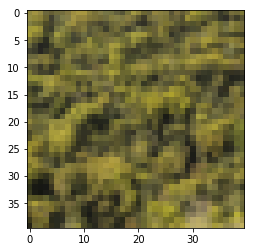

In [105]:
transform = transforms.Compose([
    transforms.RandomResizedCrop(40),
    transforms.ToTensor(),
])

example_texture = img.image_loader("data/original/trees.jpg", transform)
#example_texture = img.random_image(1, 40)

img.show_image(example_texture)

torch.Size([1, 3, 40, 40])
tensor([[[[0.1806, 0.1794, 0.1789,  ..., 0.1632, 0.1634, 0.1617],
          [0.1797, 0.1787, 0.1776,  ..., 0.1611, 0.1607, 0.1596],
          [0.1800, 0.1791, 0.1785,  ..., 0.1589, 0.1579, 0.1567],
          ...,
          [0.1607, 0.1611, 0.1618,  ..., 0.1787, 0.1797, 0.1803],
          [0.1634, 0.1632, 0.1633,  ..., 0.1794, 0.1806, 0.1823],
          [0.1656, 0.1646, 0.1642,  ..., 0.1807, 0.1825, 0.1843]],

         [[0.1632, 0.1622, 0.1617,  ..., 0.1457, 0.1456, 0.1440],
          [0.1624, 0.1615, 0.1606,  ..., 0.1444, 0.1439, 0.1428],
          [0.1627, 0.1619, 0.1613,  ..., 0.1429, 0.1419, 0.1408],
          ...,
          [0.1439, 0.1444, 0.1453,  ..., 0.1615, 0.1624, 0.1631],
          [0.1456, 0.1457, 0.1461,  ..., 0.1622, 0.1632, 0.1647],
          [0.1471, 0.1465, 0.1465,  ..., 0.1631, 0.1646, 0.1664]],

         [[0.0422, 0.0418, 0.0414,  ..., 0.0362, 0.0361, 0.0357],
          [0.0417, 0.0413, 0.0411,  ..., 0.0362, 0.0360, 0.0357],
          [0.04

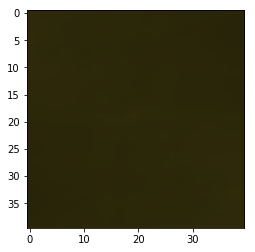

In [115]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
importlib.reload(losses)
target = losses.deep_correlation_matrix(example_texture)
y = img.random_image(4, 40)
print(target.size())
img.show_image(target)
print(target)
print(losses.deep_correlation_loss([target], [y]))

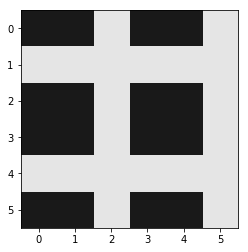

In [73]:
a = [0.1,0.1,0.9,0.1,0.1,0.9]
b = [0.9, 0.9, 0.9, 0.9, 0.9, 0.9]
c = []

c.append(a)
c.append(b)
c.append(a)
c.append(a)
c.append(b)
c.append(a)


d = [c for i in range(3)]
e = [d]
f = torch.tensor(e).float().to(device)
f
img.show_image(f)

tensor([[[[0.4544, 0.3087, 0.3167, 0.4544, 0.3167, 0.3087],
          [0.3193, 0.2564, 0.3020, 0.3193, 0.3020, 0.2564],
          [0.3033, 0.1820, 0.2150, 0.3033, 0.2150, 0.1820],
          [0.4544, 0.3087, 0.3167, 0.4544, 0.3167, 0.3087],
          [0.3033, 0.1820, 0.2150, 0.3033, 0.2150, 0.1820],
          [0.3193, 0.2564, 0.3020, 0.3193, 0.3020, 0.2564]],

         [[0.4544, 0.3087, 0.3167, 0.4544, 0.3167, 0.3087],
          [0.3193, 0.2564, 0.3020, 0.3193, 0.3020, 0.2564],
          [0.3033, 0.1820, 0.2150, 0.3033, 0.2150, 0.1820],
          [0.4544, 0.3087, 0.3167, 0.4544, 0.3167, 0.3087],
          [0.3033, 0.1820, 0.2150, 0.3033, 0.2150, 0.1820],
          [0.3193, 0.2564, 0.3020, 0.3193, 0.3020, 0.2564]],

         [[0.4544, 0.3087, 0.3167, 0.4544, 0.3167, 0.3087],
          [0.3193, 0.2564, 0.3020, 0.3193, 0.3020, 0.2564],
          [0.3033, 0.1820, 0.2150, 0.3033, 0.2150, 0.1820],
          [0.4544, 0.3087, 0.3167, 0.4544, 0.3167, 0.3087],
          [0.3033, 0.1820, 0.2150, 0

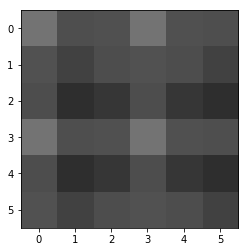

In [63]:
importlib.reload(losses)
target = losses.deep_correlation_matrix(f)
print(target)
img.show_image(target)

tensor([[[[0.1403, 0.0145, 0.1433, 0.0000, 0.0000],
          [0.7401, 0.0055, 0.0001, 0.0000, 0.0000],
          [0.0172, 0.1598, 0.2904, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]],

         [[0.0445, 0.0586, 0.0383, 0.0000, 0.0000],
          [0.0512, 0.1370, 0.3692, 0.0000, 0.0000],
          [0.3193, 0.2374, 0.0041, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]],

         [[0.0172, 0.7417, 0.1908, 0.0000, 0.0000],
          [0.0321, 0.1908, 0.1833, 0.0000, 0.0000],
          [0.2998, 0.6071, 0.0134, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]]]],
       device='cuda:0', grad_fn=<ThMulBackward>)
0.1111111111111111
tensor([[[[0.0156, 0.0016, 0.0159, 0.0000, 0.0000],
          [0.0822, 0.0006, 0.0000, 0.0000, 0.0000],
          [0.0019, 0.0178, 0.0323, 0.0000

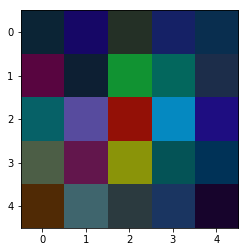

In [22]:
importlib.reload(losses)
y = img.random_image(1, 5)
target = losses.deep_correlation_matrix(y)
#img.show_image(y)
img.show_image(target)

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]],
       device='cuda:0', grad_fn=<SliceBackward>)

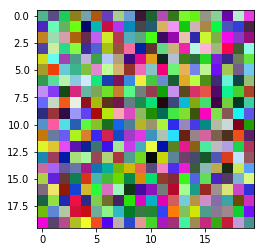

In [21]:
y = img.random_image(1, 20)
img.show_image(y)
z = y.new(y * 0)
z